In [1]:
import pandas as pd
import matplotlib.pyplot as plt
milk = pd.read_csv('Course5/Week1/monthly-milk-production.csv',
                   ';', index_col=['month'], parse_dates=['month'], dayfirst=True)

Populating the interactive namespace from numpy and matplotlib


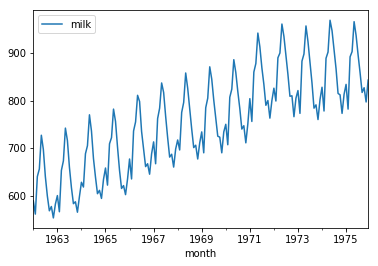

In [2]:
%pylab inline
milk.plot()

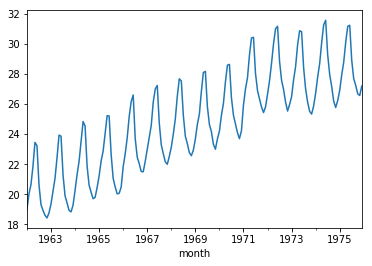

In [33]:
milk.daily = milk.milk / milk.index.days_in_month
milk.daily.plot()

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:



1
milk.daily_diff1 = milk.daily - milk.daily.shift(1)
Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:



1
milk.daily_diff12 = milk.daily - milk.daily.shift(12)
При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

Дифференцирование не нужно, исходный ряд уже стационарен

Ряд становится стационарным после однократного дифференцирования

Ряд становится стационарным после сезонного дифференцирования

Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного

In [34]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk.daily)

(-1.1798216373266113,
 0.68221515130814081,
 12L,
 155L,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.5708067458066353)

In [40]:
milk['daily_diff1'] =  milk.daily - milk.daily.shift(1)
milk.describe()
sm.tsa.stattools.adfuller(milk[milk.daily_diff1.notnull()].daily_diff1)

(-2.7594694762289111,
 0.064300546541746925,
 11L,
 155L,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.8803740821053339},
 -1.153997338105512)

In [41]:
milk['daily_diff12'] =  milk.daily - milk.daily.shift(12)
milk.describe()
sm.tsa.stattools.adfuller(milk[milk.daily_diff12.notnull()].daily_diff12)

(-2.159486093288808,
 0.22127672658830372,
 12L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -25.225679141303317)

In [43]:
milk['daily_diff12_1'] =  milk.daily_diff12 - milk.daily_diff12.shift(1)
milk.describe()
sm.tsa.stattools.adfuller(milk[milk.daily_diff12_1.notnull()].daily_diff12_1)

(-5.481326334796929,
 2.2808455518037136e-06,
 11L,
 143L,
 {'1%': -3.4769274060112707,
  '10%': -2.5776654080884152,
  '5%': -2.8819726324025625},
 -20.90513750989237)

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:



1
2
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?


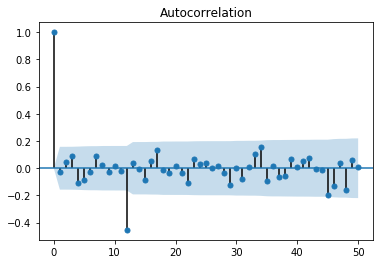

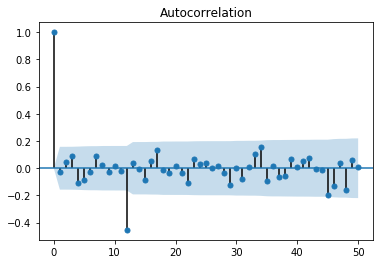

In [53]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk[milk.daily_diff12_1.notnull()]['daily_diff12_1'].values.squeeze(), lags=50)

In [54]:
print 'Answer - 1'

Answer - 1


Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:



1
2
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

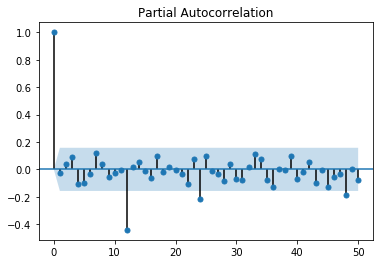

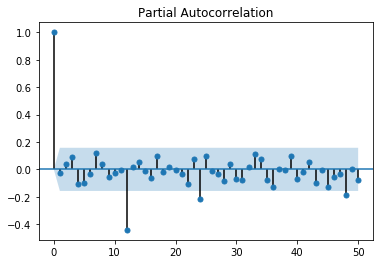

In [55]:
sm.graphics.tsa.plot_pacf(milk[milk.daily_diff12_1.notnull()]['daily_diff12_1'].values.squeeze(), lags=50)

In [56]:
print 'Answer p=0'

Answer p=0
